In [231]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import ndimage
import pylab as pl
from matplotlib import collections  as mc
import time


(600, 800)

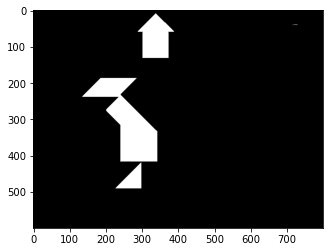

In [106]:
img = cv.imread('2.png',0)
trhesh,img = cv.threshold(img, 240,1, cv.THRESH_BINARY)
img = img[31:-1,1:-1]
img[500:,:] = 0
plt.imshow(img*255,cmap = 'gray')
img.shape

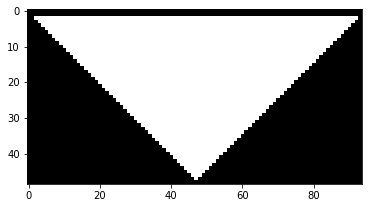

In [191]:
##templates
template = cv.imread('smallt.png',0)
t2,template = cv.threshold(template, 100,1, cv.THRESH_BINARY)
plt.imshow(template*255,cmap='gray')

small_t_templates =[template]
for r in range(-45,-325,-45):
    rotated= ndimage.rotate(template,r)
    nonzero = rotated.nonzero()
    rotated= rotated[min(nonzero[0])-2:max(nonzero[0])+2,min(nonzero[1])-2:max(nonzero[1])+2]
    small_t_templates.append(rotated)
plt.imshow(small_t_templates[4],cmap='gray')

4161600.0
(235, 66)
4161600.0
(307, 66)
4161600.0
(239, 230)


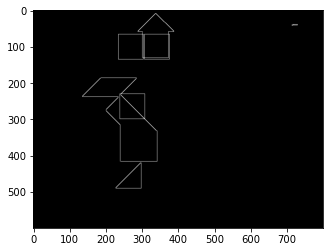

In [205]:
current = small_t_templates[1]
edges = cv.Canny(current*255,100,200)
image = cv.Canny(img*255,100,200)
#
#image =img.copy()

h, w = current.shape[:2]

method = cv.TM_SQDIFF



res = cv.matchTemplate(image, edges, method, mask=  current)
#res = cv.matchTemplate(image, current, method)
# fake out max_val for first run through loop
min_val = 1
for i in range(3):
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print(min_val)
    print(min_loc)
         
    xt = min_loc[1]-h//2 if min_loc[1]>20 else 0
    xb = min_loc[1]+h//2+1
    yl = min_loc[0]-w//2 if min_loc[0]>20 else 0
    yr = min_loc[0]+w//2+1
    #res[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0 
    res[xt:xb,yl:yr] = float('inf') 
    cv.rectangle(image,(min_loc[0],min_loc[1]), (min_loc[0]+w+1, min_loc[1]+h+1), 255 )
        


plt.imshow(image,cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1d0e18a40a0>)

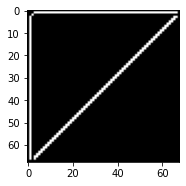

In [214]:
plt.subplot(121),plt.imshow(edges,cmap='gray')

In [235]:
#fig,axs = plt.subplots(2,4)
#fig.set_figheight(10)
#fig.set_figwidth(20)
available_placements =[]
start = time.time()
for ti,ax in zip(range(len(small_t_templates)),axs.ravel()):
    current = small_t_templates[ti]
    edges = cv.Canny(current*255,100,200)
    image = cv.Canny(img*255,100,200)

    h, w = current.shape[:2]

    method = cv.TM_SQDIFF



    res = cv.matchTemplate(image, edges, method, mask=  current)
    
    i=0
    
    while i < 4:
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        xt = min_loc[1]-h//2 if min_loc[1]>20 else 0
        xb = min_loc[1]+h//2+1
        yl = min_loc[0]-w//2 if min_loc[0]>20 else 0
        yr = min_loc[0]+w//2+1
        
        res[xt:xb,yl:yr] = float('inf')
        central_coord = (min_loc[1]+h//2,min_loc[0]+w//2)
        if (img[central_coord] ==1):
            #print((min_loc[1]+h//2,min_loc[0]+w//2))
            #cv.rectangle(image,(min_loc[0],min_loc[1]), (min_loc[0]+w+1, min_loc[1]+h+1), 255 )
            available_placements.append((central_coord,ti*45))
            i+=1
        #ax.imshow(image,cmap='gray')
print(time.time()-start)
print(available_placements)

0.33347511291503906
[((215, 179), 0), ((467, 271), 0), ((393, 297), 0), ((31, 337), 0), ((100, 341), 45), ((385, 310), 45), ((308, 233), 45), ((34, 364), 45), ((279, 264), 90), ((304, 289), 90), ((329, 314), 90), ((52, 358), 90), ((451, 266), 135), ((99, 341), 135), ((384, 310), 135), ((206, 167), 135), ((209, 240), 180), ((298, 246), 180), ((323, 271), 180), ((393, 285), 180), ((300, 308), 225), ((99, 342), 225), ((384, 311), 225), ((265, 273), 225), ((464, 275), 270), ((373, 319), 270), ((88, 350), 270), ((88, 350), 270), ((219, 253), 315), ((73, 338), 315), ((385, 273), 315), ((330, 273), 315)]


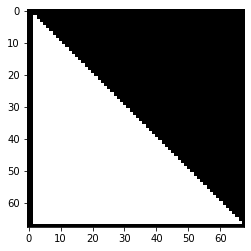

In [226]:
plt.imshow(small_t_templates[5],cmap='gray')